In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [4]:
from ai4good import *

In [5]:
col = ['ID', 'Birth_Year', 'Gender', 'Skill_1', 'Skill_1_Weight', 'Skill_2', 'Skill_2_Weight', "City_Of_Profile",
          'Country_Of_Profile', 'Education', 'Elite_Institution', 'Start_Date', 'Valid_Start_Date', 
           'End_Date', 'Valid_End_Date', 'Current_Employer', 'Length_At_Job', 'Role', 'Department',
          'Company', 'Normalized_Company', 'Ticker', 'Exchange', 'Publicly_Traded', 'Location_Of_Employment',
           'Industry', 'Education_Flag', 'Degree_Type', 'Elite_Flag', 'Majors', 'Major_Categories' , 'Unknown1', 'Unknown2']

In [6]:
# n =  2915050#number of records in file
# s = 3000 #desired sample size
# filename = "data.txt"
# skip = sorted(random.sample(xrange(n),n-s))
# df = pd.read_csv('bay_area.csv',  sep = '\t', header = None, skiprows = skip)


In [7]:
bay_area = pd.read_csv('bay_area_sample.csv',  sep = '\t', header = None)
bay_area.columns = col
bay_area.head()

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
0,aafe5525-f68f-395e-be90-880ec1205e04,2001,0,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,False,NaN,62,False,NaN,False,NaN,NaN,NaN,1.534542e+12
1,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
2,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
3,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,False,United States,TIME_OFF,False,NaN,False,NaN,NaN,NaN,1.538847e+12
4,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,False,NaN,54,False,NaN,False,NaN,NaN,NaN,1.538847e+12


In [9]:
bay_area['Major_Categories'].value_counts()

Social Sciences                                                        104
Humanities                                                              53
Engineering                                                             52
Physical Sciences                                                       17
Health & Medicine                                                        7
Social Sciences,Humanities                                               5
Physical Sciences,Social Sciences                                        3
Physical Sciences,Humanities                                             2
Physical Sciences,Engineering                                            2
Biological Sciences,Humanities                                           1
Health & Medicine,Social Sciences                                        1
Engineering,Humanities                                                   1
"Engineering, Health & Medicine"                                         1
"Biological Sciences, Hea

In [10]:
bay_area.dtypes

ID                         object
Birth_Year                 object
Gender                      int64
Skill_1                    object
Skill_1_Weight            float64
Skill_2                    object
Skill_2_Weight            float64
City_Of_Profile            object
Country_Of_Profile         object
Education                 float64
Elite_Institution          object
Start_Date                 object
Valid_Start_Date           object
End_Date                   object
Valid_End_Date             object
Current_Employer           object
Length_At_Job             float64
Role                       object
Department                 object
Company                    object
Normalized_Company         object
Ticker                     object
Exchange                   object
Publicly_Traded            object
Location_Of_Employment     object
Industry                   object
Education_Flag             object
Degree_Type               float64
Elite_Flag                 object
Majors        

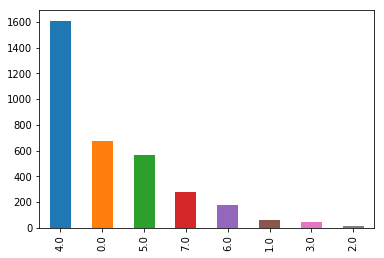

In [11]:
bay_area['Education'].value_counts().plot(kind = 'bar')

Text(0, 0.5, 'Length at Job')

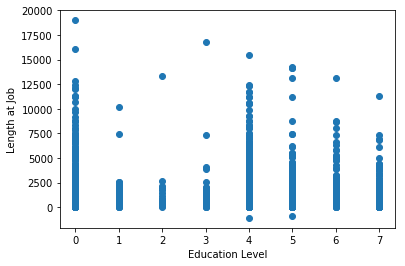

In [12]:
plt.scatter(y = 'Length_At_Job', x = 'Education', data = bay_area)
plt.xlabel('Education Level')
plt.ylabel('Length at Job')

Text(0, 0.5, 'Length at Job')

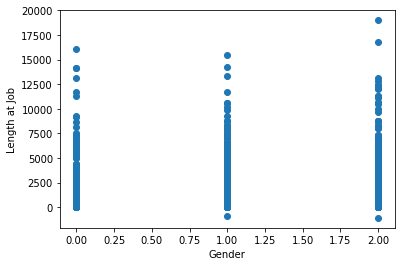

In [13]:
plt.scatter(y = 'Length_At_Job', x = 'Gender', data = bay_area)
plt.xlabel('Gender')
plt.ylabel('Length at Job')

Text(0.5, 0, 'Gender')

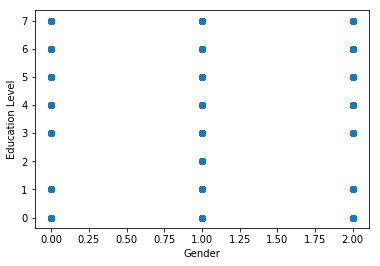

In [14]:
plt.scatter(x = 'Gender', y = 'Education', data = bay_area)
plt.ylabel('Education Level')
plt.xlabel('Gender')

In [15]:
sum(bay_area['Majors'].isna())

3190

In [16]:
skill_12 = bay_area[bay_area['Skill_1'] != "-1"]
skill_12

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
24,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,4.0,...,False,NaN,NaN,True,4.0,False,NaN,NaN,NaN,1.497025e+12
25,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,4.0,...,False,sandia national laboratories,92,False,NaN,False,NaN,NaN,NaN,1.497025e+12
26,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,4.0,...,True,"milpitas, ca",334112,False,NaN,False,NaN,NaN,BBG000BWNFZ9,1.497025e+12
27,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,4.0,...,True,"milpitas, california",334112,False,NaN,False,NaN,NaN,BBG000BWNFZ9,1.497025e+12
54,50b38118-3fc4-3fcf-9c2e-ca15e7783d0b,1987,0,Healthcare,0.992612,Personal Coaching,0.006924,San Francisco,United States,0.0,...,False,NaN,NaN,True,NaN,False,NaN,NaN,NaN,1.538925e+12
55,50b38118-3fc4-3fcf-9c2e-ca15e7783d0b,1987,0,Healthcare,0.992612,Personal Coaching,0.006924,San Francisco,United States,0.0,...,False,NaN,NaN,True,NaN,False,NaN,NaN,NaN,1.538925e+12
56,50b38118-3fc4-3fcf-9c2e-ca15e7783d0b,1987,0,Healthcare,0.992612,Personal Coaching,0.006924,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538925e+12
57,50b38118-3fc4-3fcf-9c2e-ca15e7783d0b,1987,0,Healthcare,0.992612,Personal Coaching,0.006924,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538925e+12
58,50b38118-3fc4-3fcf-9c2e-ca15e7783d0b,1987,0,Healthcare,0.992612,Personal Coaching,0.006924,San Francisco,United States,0.0,...,False,"fremont, ca",62,False,NaN,False,NaN,NaN,NaN,1.538925e+12
61,3d778dc1-b5ee-3d97-afa6-ecac78b64355,1982,2,Graphic Design,0.347170,Administration,0.333711,Santa Cruz,United States,0.0,...,False,NaN,NaN,True,NaN,False,NaN,NaN,NaN,1.525279e+12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

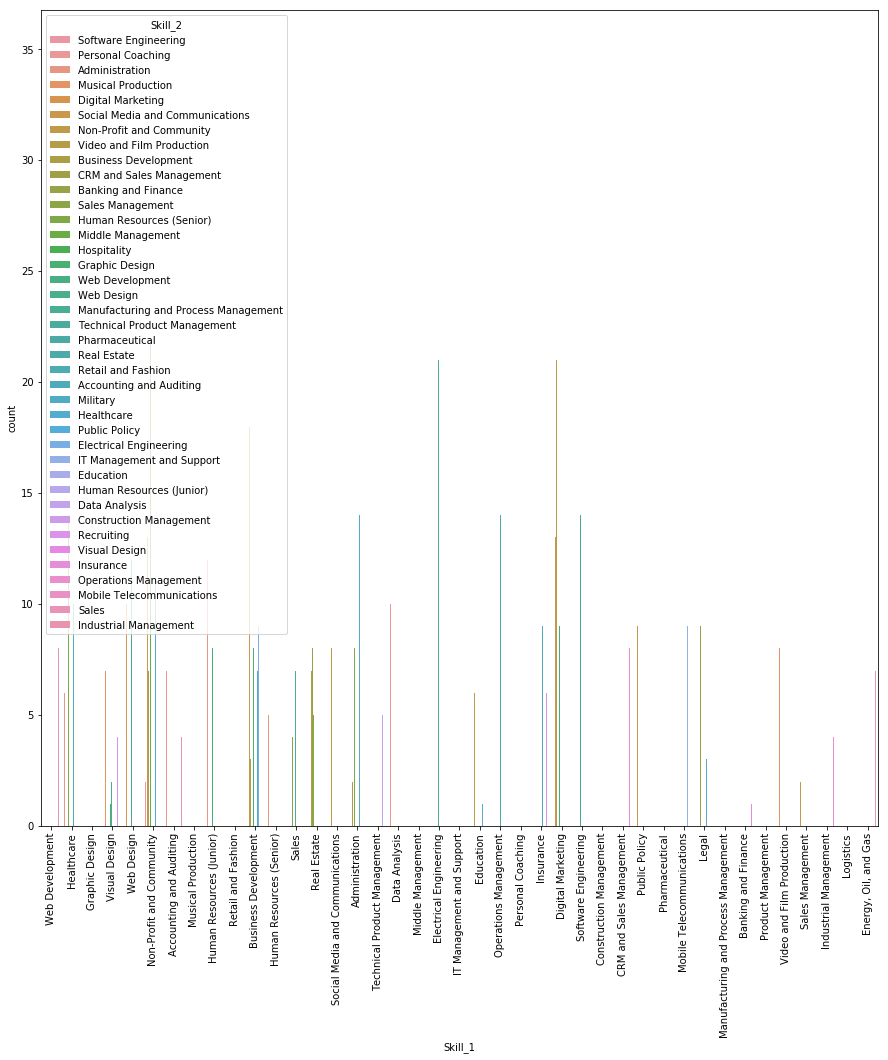

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Skill_1', hue = 'Skill_2', data = skill_12)
plt.xticks(rotation = 90)

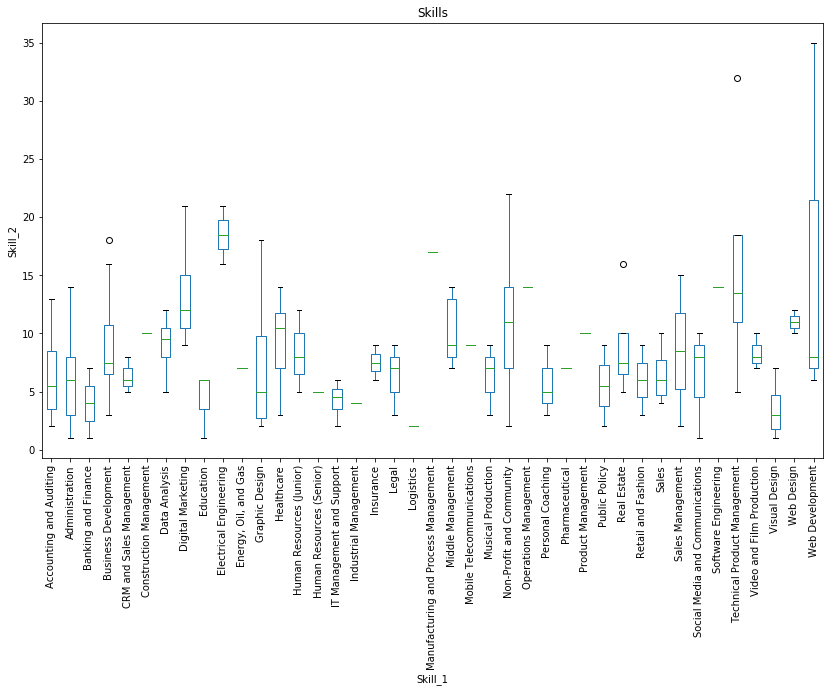

In [18]:
skill_12 = bay_area[bay_area['Skill_1'] != "-1"]
ax = skill_12.groupby(['Skill_1','Skill_2'])['Birth_Year'].count().unstack(0).plot(kind= 'box', title="Skills", figsize=(14,8))
plt.xticks(rotation = 90)
_ = ax.set_xlabel('Skill_1')
_ = ax.set_ylabel('Skill_2')

Text(0, 0.5, 'Skill2')

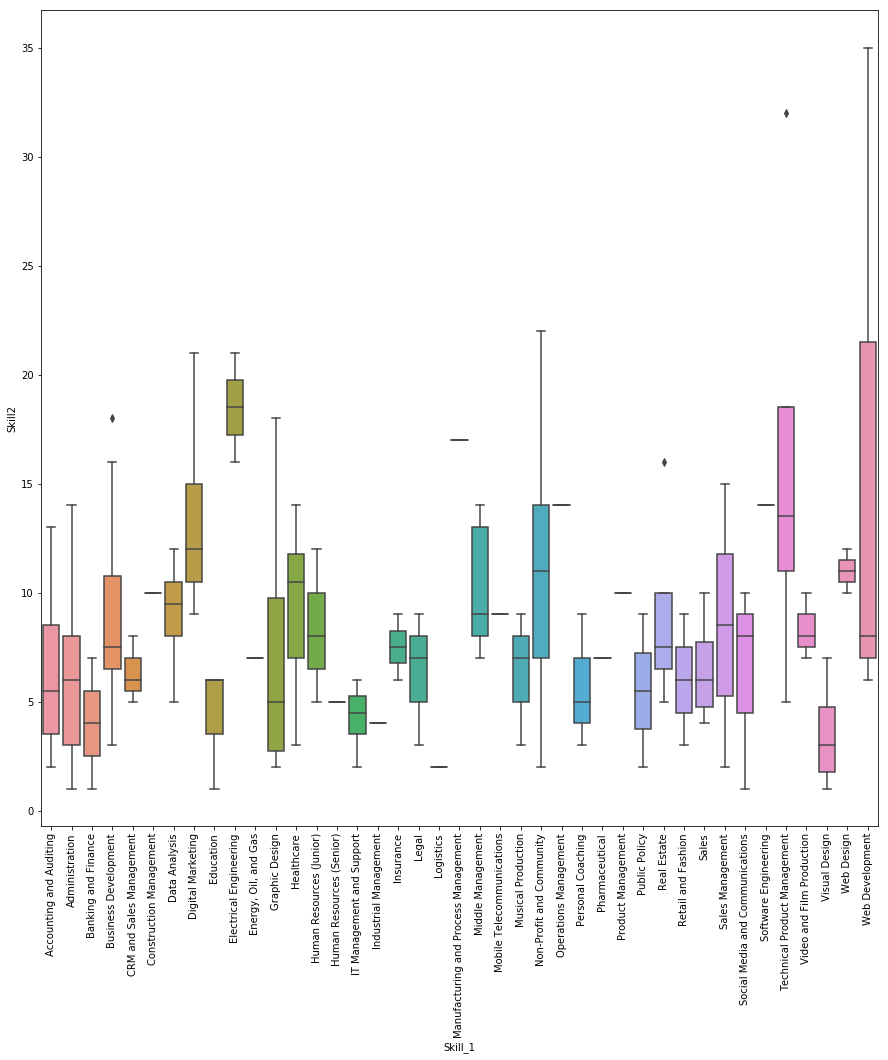

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
skill_12 = bay_area[bay_area['Skill_1'] != "-1"]
skill_12 = skill_12.groupby(['Skill_1', 'Skill_2']).count()
sns.boxplot(x = skill_12.index.get_level_values(0), y = 'Birth_Year', data = skill_12)
plt.xticks(rotation = 90)
plt.ylabel('Skill2')
#plt.yticks(skill_12.index.get_level_values(1))
#['Birth_Year'].unstack().plot(ax=ax)
#skill_12
#skill12['ID'].plot()
#skill12

In [20]:
skill_21 = bay_area.groupby(['Skill_2', 'Skill_1']).count()
skill_21.head()

ID  Birth_Year  Gender  \
Skill_2                 Skill_1                                             
-1                      -1                       2377        2377    2377   
Accounting and Auditing Administration              7           7       7   
                        Insurance                   9           9       9   
Administration          Accounting and Auditing     7           7       7   
                        Administration              3           3       3   

                                                 Skill_1_Weight  \
Skill_2                 Skill_1                                   
-1                      -1                                 2377   
Accounting and Auditing Administration                        7   
                        Insurance                             9   
Administration          Accounting and Auditing               7   
                        Administration                        3   

                                                 Skill_2_Weight  \
Skill_2                 Skill_1                                   
-1                      -1                                 2377   
Accounting and Auditing Administration                        7   
                        Insurance                             9   
Administration          Accounting and Auditing               7   
                        Administration                        3   

                                                 City_Of_Profile  \
Skill_2                 Skill_1                                    
-1                      -1                                  2179   
Accounting and Auditing Administration                         7   
                        Insurance                              9   
Administration          Accounting and Auditing                7   
                        Administration                         3   

                                                 Country_Of_Profile  \
Skill_2                 Skill_1                                       
-1                      -1                                     2377   
Accounting and Auditing Administration                            7   
                        Insurance                                 9   
Administration          Accounting and Auditing                   7   
                        Administration                            3   

                                                 Education  Elite_Institution  \
Skill_2                 Skill_1                                                 
-1                      -1                            2376               2376   
Accounting and Auditing Administration                   7                  7   
                        Insurance                        9                  9   
Administration          Accounting and Auditing          7                  7   
                        Administration                   3                  3   

                                                 Start_Date    ...     \
Skill_2                 Skill_1                                ...      
-1                      -1                             2376    ...      
Accounting and Auditing Administration                    7    ...      
                        Insurance                         9    ...      
Administration          Accounting and Auditing           7    ...      
                        Administration                    3    ...      

                                                 Publicly_Traded  \
Skill_2                 Skill_1                                    
-1                      -1                                  2376   
Accounting and Auditing Administration                         7   
                        Insurance                              9   
Administration          Accounting and Auditing                7   
                        Administration                         3   

                                       

In [21]:
bay_area['Company'].value_counts()

TIME_OFF                                                  211
MISSING                                                    57
University of California, Berkeley                         51
-                                                          36
San Francisco State University                             31
Google                                                     30
San Jose State University                                  24
Stanford University                                        17
University of California, Los Angeles                      12
UC Berkeley                                                11
IBM                                                        11
Genentech                                                  11
Deloitte                                                   10
Hewlett-Packard                                             9
Kaiser Permanente                                           9
University of San Francisco                                 9
Academy 

In [22]:
bay_area['Industry'].value_counts()

TIME_OFF    211
54          209
611310      137
519130       88
51           76
52           59
MISSING      57
61           56
62           52
92           46
611710       41
81           40
42           34
511210       34
33           32
334413       30
53           30
541512       26
71           23
45           20
541519       14
561          14
813410       12
334412       12
334220       12
522110       12
56           11
713940       10
928110        9
334210        9
           ... 
238           1
3256          1
922190        1
622210        1
623110        1
336111        1
424210        1
441110        1
443142        1
334513        1
446110        1
316992        1
446120        1
515120        1
812191        1
531           1
333314        1
623311        1
519           1
444110        1
325130        1
541           1
333316        1
333132        1
532           1
312230        1
326           1
522294        1
325180        1
722           1
Name: Industry, Length: 

In [23]:
#bay_area['Majors'].value_counts()

In [50]:
#why is this not a valid start month?
#bay_area[bay_area[12] == False].iloc[:,11]

In [51]:
#bay_area[32].value_counts()

[Column 0] ID

[Column 1] Birth year: where available

[Column 2] Gender flag: 1=female, 2=male, 0=unknown

[Column 3] Skillset1: primary skillset deduced from self-reported skills

[Column 4] Skillset1 weight: the extent to which primary skillset is representative of overall
self-reported skills

[Column 5] Skillset2: secondary skillset deduced from self-reported skills

[Column 6] Skillset2 weight: the extent to which secondary skillset is representative of
overall self-reported skills

[Column 7] City of profile (does not change): where unavailable, the field is left blank

[Column 8] Country of Profile (does not change)

[Column 9] Education (highest degree attained): 0=none/unknown; 1=high school;
2=vocational degree; 3=associate's; 4=bachelor's; 5=master's other than MBA; 6=MBA;
7=doctorate (PhD/JD/MD)

[Column 10] Elite institution: a flag indicating whether any of the person's main degrees
came from an elite (top 100) institution [NB: Romanian names not covered]

[Column 11] Start date

[Column 12] Flag: Is the start month valid?

[Column 13] End date

[Column 14] Flag: Is the end month valid?

[Column 15] Flag: Is this their current employment?

[Column 16] Length: length of time spent at the given job (days)

[Column 17] Role: the self-reported job role, followed by the normalized job title (the two
are separated by a comma)

[Column 18] Department: the self-reported job role, followed by the associated
department, if it's possible to tell (the two are separated by a comma)

[Column 19] Company name

[Column 20] Normalized company name: accounts for things like subsidiaries, etc.

[Column 21] Ticker: also included are tickers for private company, where available from
sources like Bloomberg (not that good; but the public company ones, coming from
exchanges, are pretty comprehensive); for things like universities, government jobs, etc.
these are demarcated accordingly (e.g., FREELANCE is the ticker for self-employed)

[Column 22] Exchange: for disambiguated private companies or hard-coded roles it's just
the country location

[Column 23] Flag for whether the firm is publicly traded

[Column 24] Location of Employment

[Column 25] Industry (NAICS)

[Column 26] Education flag: True=this entry reflects an education record;
False=employment record

[Column 27] Degree type: 0=none/unknown; 1=high school; 2=vocational degree;
3=associate's; 4=bachelor's; 5=master's other than MBA; 6=MBA; 7=doctorate
(PhD/JD/MD); empty if it's not an education record

[Column 28] Elite flag: True=education record from an elite (top 100) institution; False=not
an education record, or education record from a non-elite institution

[Column 29] Majors

[Column 30] Major Categories

[Column 31] DROP NOT NEEDED

[Column 32] DROP NOT NEEDED

In [24]:
example = bay_area[bay_area['ID']== 'ca815a23-5ed5-3485-992f-6e0acc45b83a']
example['row'] = np.arange(1,10)
example

/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2,row
1,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12,1
2,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12,2
3,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,United States,TIME_OFF,False,NaN,False,NaN,NaN,NaN,1.538847e+12,3
4,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,54,False,NaN,False,NaN,NaN,NaN,1.538847e+12,4
5,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,519130,False,NaN,False,NaN,NaN,BBG000BGKHZ3,1.538847e+12,5
6,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12,6
7,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12,7
8,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,sunnyvale,541512,False,NaN,False,NaN,NaN,BBG0078W3NQ3,1.538847e+12,8
9,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.0,-1,0.0,San Francisco,United States,0.0,...,"sunnyvale, ca, usa",541512,False,NaN,False,NaN,NaN,BBG0078W3NQ3,1.538847e+12,9


In [25]:
#if no education, then their birth year is 2001, logic was broken somewhere ignore first job + 22 better accurate 

In [26]:
example['Start_Date']

1    1997-07-01
2    2000-11-01
3    2002-01-01
4    2003-11-01
5    2006-01-01
6    2006-08-01
7    2008-12-01
8    2014-09-01
9    2015-12-01
Name: Start_Date, dtype: object

In [27]:
example['Company']

1                   Weathernews
2               Intertrust Inc.
3                      TIME_OFF
4       HydroPoint Data Systems
5                      VeriSign
6                 ActivIdentity
7       ArcSight, an HP Company
8    Hewlett Packard Enterprise
9    Hewlett Packard Enterprise
Name: Company, dtype: object

In [28]:
example['Length_At_Job']

1    1188.0
2     426.0
3     638.0
4     639.0
5     212.0
6     762.0
7    2130.0
8     426.0
9    1135.0
Name: Length_At_Job, dtype: float64

In [29]:
#  the self-reported job role, followed by the associated department
[print(i) for i in example['Role']]

Data Specialist,data,specialist
Software QA Engineer,quality assurance,software,engineer
nan
Data Manager,data,manager
Escalations Engineer,engineer
Senior Technical Support Engineer,technical support engineer,senior
Technical Solutions Consultant IV USA at ArcSight an HP Company,technical,consultant,4,",",company
Training Manager,training manager
Security Intelligence Content Developer,security,developer


[None, None, None, None, None, None, None, None, None]

In [30]:
[print(i) for i in example['Department']]

nan
PRODUCTION,TECHNOLOGY
nan
nan
nan
MARKETING
BUSINESS
HR
OPERATIONS


[None, None, None, None, None, None, None, None, None]

In [31]:
unique_ids = bay_area['ID'].unique()

In [32]:
bay_area

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
0,aafe5525-f68f-395e-be90-880ec1205e04,2001,0,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,62,False,NaN,False,NaN,NaN,NaN,1.534542e+12
1,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
2,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
3,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,United States,TIME_OFF,False,NaN,False,NaN,NaN,NaN,1.538847e+12
4,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,54,False,NaN,False,NaN,NaN,NaN,1.538847e+12
5,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,True,NaN,519130,False,NaN,False,NaN,NaN,BBG000BGKHZ3,1.538847e+12
6,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
7,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,False,NaN,NaN,False,NaN,False,NaN,NaN,NaN,1.538847e+12
8,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,True,sunnyvale,541512,False,NaN,False,NaN,NaN,BBG0078W3NQ3,1.538847e+12
9,ca815a23-5ed5-3485-992f-6e0acc45b83a,2001,1,-1,0.000000,-1,0.000000,San Francisco,United States,0.0,...,True,"sunnyvale, ca, usa",541512,False,NaN,False,NaN,NaN,BBG0078W3NQ3,1.538847e+12


In [33]:
berk_edu = bay_area.loc[((bay_area["Education"] == 4) | (bay_area["Education"] == 5)  | (bay_area["Education"] == 6) | (bay_area["Education"] == 7)) & ((bay_area["Company"] == "UC Berkeley") | (bay_area["Company"] == "University of California, Berkeley")) & (bay_area["Education_Flag"] == 1)]
berk_edu

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
46,b39bcc8f-f4e4-3711-b55f-8b087f2507fd,1978,2,-1,0.000000,-1,0.000000,San Francisco,United States,4.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538838e+12
49,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7.0,...,False,NaN,NaN,True,7.0,True,mathematics,Physical Sciences,NaN,1.532640e+12
127,3243dc62-9392-3e2f-b80a-d645202a4095,1984,1,Non-Profit and Community,0.382102,Social Media and Communications,0.330193,Los Angeles,United States,7.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.540942e+12
371,72946ffd-ac13-38b6-b892-42d4f34ada77,1989,2,-1,0.000000,-1,0.000000,Boston,United States,4.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.539003e+12
571,9801ef22-addb-3722-9ad6-ab0de0558f62,1968,1,Web Design,0.494768,Web Development,0.181675,Seattle,United States,5.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538935e+12
645,5628af26-3ea5-30c2-8268-a225e86987a0,1978,0,-1,0.000000,-1,0.000000,New York City,United States,4.0,...,False,NaN,NaN,True,4.0,True,"african american studies,american studies","Social Sciences,Humanities",NaN,1.506907e+12
955,b12c2cf8-aa97-3401-991a-d3f998acd2f2,2001,0,-1,0.000000,-1,0.000000,Berkeley,United States,4.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.470441e+12
1009,5a3172d9-cef2-39ac-a873-60d517875a75,2001,2,-1,0.000000,-1,0.000000,Chicago,United States,7.0,...,False,NaN,NaN,True,7.0,True,NaN,NaN,NaN,1.539971e+12
1139,d905c49d-2196-3816-ae33-e890589054d9,1957,2,-1,0.000000,-1,0.000000,San Francisco,United States,4.0,...,False,NaN,NaN,True,4.0,True,political science,Social Sciences,NaN,1.532969e+12
1140,d905c49d-2196-3816-ae33-e890589054d9,1957,2,-1,0.000000,-1,0.000000,San Francisco,United States,4.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.532969e+12


In [34]:
#school(bay_area, 'UC Berkeley', )

In [79]:
# def school(original_table, school_name, degree, education_flag = True)
#      return original_table.loc[bay_area["Education"] == degree].loc[bay_area["Company"] == school_name].loc[bay_area["Education_Flag"] == education_flag]

In [80]:
pd.DataFrame()

""


In [144]:
def university(original_table, school_name, degree, education_flag=1):
    if type(degree) == list:
        df = pd.DataFrame()
        for deg in degree:
            instance = original_table.loc[((original_table["Education"] == deg)) 
                                     & ((original_table["Company"] == school_name)) 
                                     & (original_table["Education_Flag"] == education_flag)]
            df = pd.concat([df, instance], ignore_index=True)
        return df
    return original_table.loc[((original_table["Education"] == degree)) 
                                     & ((original_table["Company"] == school_name)) 
                                     & (original_table["Education_Flag"] == education_flag)].reset_index()

    

In [145]:
university(original_table=bay_area, school_name='UC Berkeley', degree= 8, education_flag=1)

,index,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2


In [142]:
univ(original_table=bay_area, school_name='UC Berkeley', degree= [5,6,7,8], education_flag=1)


,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2


In [143]:
univ(original_table=bay_area, school_name='University of California, Berkeley', degree= 4, education_flag=1)

,index,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
0,46,b39bcc8f-f4e4-3711-b55f-8b087f2507fd,1978,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538838e+12
1,371,72946ffd-ac13-38b6-b892-42d4f34ada77,1989,2,-1,0.000000,-1,0.000000,Boston,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.539003e+12
2,645,5628af26-3ea5-30c2-8268-a225e86987a0,1978,0,-1,0.000000,-1,0.000000,New York City,United States,...,False,NaN,NaN,True,4.0,True,"african american studies,american studies","Social Sciences,Humanities",NaN,1.506907e+12
3,955,b12c2cf8-aa97-3401-991a-d3f998acd2f2,2001,0,-1,0.000000,-1,0.000000,Berkeley,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.470441e+12
4,1139,d905c49d-2196-3816-ae33-e890589054d9,1957,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,political science,Social Sciences,NaN,1.532969e+12
5,1164,63b4f4b0-90fd-3482-b587-b3680706e20b,1988,1,-1,0.000000,-1,0.000000,Sacramento,United States,...,False,NaN,NaN,True,4.0,True,psychology,Social Sciences,NaN,1.481843e+12
6,1287,23db3c48-bf66-3960-9fec-7891efa213fc,1980,0,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,economics,Social Sciences,NaN,1.538815e+12
7,1361,bc60c191-574d-3f60-9dcb-4d3015b7d20a,2001,2,-1,0.000000,-1,0.000000,Sacramento,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538804e+12
8,1682,0e8eb1ec-f815-384e-9254-d18723e386e8,1985,1,-1,0.000000,-1,0.000000,NaN,United Arab Emirates,...,False,NaN,NaN,True,4.0,True,management,Social Sciences,NaN,1.530849e+12
9,1724,e480c126-30b4-3b8c-bb3a-a68d0b535d9a,1968,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,electrical engineering,Engineering,NaN,1.538922e+12


In [153]:
ucberkeley_undergrad = pd.DataFrame()
for i in ['University of California, Berkeley', 'UC Berkeley']:
    inst = univ(original_table=bay_area, school_name='University of California, Berkeley', degree= 4, education_flag=1)
    ucberkeley_undergrad = pd.concat([ucberkeley_undergrad, inst], ignore_index=True)

    

In [148]:
ucberkeley_undergrad

,index,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
0,46,b39bcc8f-f4e4-3711-b55f-8b087f2507fd,1978,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538838e+12
1,371,72946ffd-ac13-38b6-b892-42d4f34ada77,1989,2,-1,0.000000,-1,0.000000,Boston,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.539003e+12
2,645,5628af26-3ea5-30c2-8268-a225e86987a0,1978,0,-1,0.000000,-1,0.000000,New York City,United States,...,False,NaN,NaN,True,4.0,True,"african american studies,american studies","Social Sciences,Humanities",NaN,1.506907e+12
3,955,b12c2cf8-aa97-3401-991a-d3f998acd2f2,2001,0,-1,0.000000,-1,0.000000,Berkeley,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.470441e+12
4,1139,d905c49d-2196-3816-ae33-e890589054d9,1957,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,political science,Social Sciences,NaN,1.532969e+12
5,1164,63b4f4b0-90fd-3482-b587-b3680706e20b,1988,1,-1,0.000000,-1,0.000000,Sacramento,United States,...,False,NaN,NaN,True,4.0,True,psychology,Social Sciences,NaN,1.481843e+12
6,1287,23db3c48-bf66-3960-9fec-7891efa213fc,1980,0,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,economics,Social Sciences,NaN,1.538815e+12
7,1361,bc60c191-574d-3f60-9dcb-4d3015b7d20a,2001,2,-1,0.000000,-1,0.000000,Sacramento,United States,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538804e+12
8,1682,0e8eb1ec-f815-384e-9254-d18723e386e8,1985,1,-1,0.000000,-1,0.000000,NaN,United Arab Emirates,...,False,NaN,NaN,True,4.0,True,management,Social Sciences,NaN,1.530849e+12
9,1724,e480c126-30b4-3b8c-bb3a-a68d0b535d9a,1968,2,-1,0.000000,-1,0.000000,San Francisco,United States,...,False,NaN,NaN,True,4.0,True,electrical engineering,Engineering,NaN,1.538922e+12


In [154]:
ucberkeley_grad = pd.DataFrame()
for i in ['University of California, Berkeley', 'UC Berkeley']:
    inst = univ(original_table=bay_area, school_name='University of California, Berkeley', degree= [5,6,7], education_flag=1)
    ucberkeley_grad = pd.concat([ucberkeley_grad, inst], ignore_index=True)

In [160]:
ucberkeley_grad.head()

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
0,9801ef22-addb-3722-9ad6-ab0de0558f62,1968,1,Web Design,0.494768,Web Development,0.181675,Seattle,United States,5.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538935e+12
1,3b31713b-a554-333f-ae6b-823ab4eaa360,1980,1,Data Analysis,0.329413,Administration,0.180861,Albany,United States,5.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538947e+12
2,ded1ae4b-e386-34eb-8ac2-9345d9837ffe,1969,2,-1,0.000000,-1,0.000000,NaN,United States,5.0,...,False,NaN,NaN,True,4.0,True,physics,Physical Sciences,NaN,1.477355e+12
3,19ab285d-b54f-3eee-9651-af9fb5ce10f5,1968,1,-1,0.000000,-1,0.000000,Los Angeles,United States,5.0,...,False,NaN,NaN,True,4.0,True,NaN,NaN,NaN,1.538875e+12
4,19ab285d-b54f-3eee-9651-af9fb5ce10f5,1968,1,-1,0.000000,-1,0.000000,Los Angeles,United States,5.0,...,False,NaN,NaN,True,5.0,True,NaN,NaN,NaN,1.538875e+12


In [168]:
job_role_keywords = ['eecs', 'Bachelor']

In [169]:
berk_edu_job = [[i in berk_edu["Role"].iloc[j] for i in job_role_keywords] for j in range(len(berk_edu))]

In [170]:
berk_edu_job

[[False, False],
 [False, False],
 [False, True],
 [False, True],
 [False, False],
 [False, False],
 [False, True],
 [False, False],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, False],
 [False, True],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, True],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, True],
 [False, True],
 [False, False],
 [False, True],
 [False, True],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, False],
 [False, True],
 [False, True],
 [False, False],
 [False, False],
 [False, True],
 [False, True],
 [False, False]]

In [177]:
counts = {}
for i in bay_area.ID:
    if i in counts:
        counts[i] += 1
    else:
        counts[i] = 1

In [178]:
counts

{'aafe5525-f68f-395e-be90-880ec1205e04': 1,
 'ca815a23-5ed5-3485-992f-6e0acc45b83a': 9,
 '7a8bb252-f5d7-3d4c-ba88-8d0a40edf994': 2,
 '7fe26019-f275-3471-8fef-2c8a6d2f6f95': 12,
 '3095f7eb-b536-39ca-8bd4-949a290deed9': 4,
 '4ce9f6ff-ac3d-3247-839a-0faa60423951': 4,
 'c0dd00b0-ffa7-33bd-acf9-0bcb1ce5e750': 9,
 'c48e3173-72ea-39a6-9a75-d16f0c049549': 5,
 'b39bcc8f-f4e4-3711-b55f-8b087f2507fd': 2,
 '2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb': 6,
 '50b38118-3fc4-3fcf-9c2e-ca15e7783d0b': 5,
 'b4147c35-97f1-34a0-a624-fa63c4bf4443': 2,
 '3d778dc1-b5ee-3d97-afa6-ecac78b64355': 3,
 'a0f394d1-c089-3436-8ff1-5ea28f42ba3c': 10,
 '8ef6be6c-f695-3f98-a6bb-458d7b01634b': 7,
 'ec4606a8-0a7b-35bc-a68b-fd00067810da': 6,
 '7d2d43ff-db8a-3ba7-a7e0-2ef51c9459a7': 11,
 'f72c2253-26c3-3549-800a-8783046e570d': 7,
 'd5dc4adf-7444-38c2-84d7-10dcaa5cba78': 10,
 'cad033f2-5fa5-3172-95fa-9548a6de57e3': 12,
 '3243dc62-9392-3e2f-b80a-d645202a4095': 6,
 'a06067ad-b547-38b1-85f3-0c572e03f740': 10,
 'f31aff5e-2dbc-3965-b060-

In [198]:
maxrows = 0
index = 0
maxindex = 0
for i in counts.values():
    if i > maxrows:
        maxindex = index
        maxrows = i
    index+=1

In [199]:
maxrows, maxindex

(25, 214)

In [188]:
bay_area.iloc[maxindex]['ID']

'53fb6096-41fe-3625-9bd9-5d51d2c9e610'

In [189]:
maxid = bay_area.iloc[maxindex][0]

In [196]:
example2 = bay_area[bay_area['ID'] == bay_area.iloc[maxindex][0]]

In [197]:
example2

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories,Unknown1,Unknown2
214,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,"asuncion, paraguay",NaN,False,NaN,False,NaN,NaN,NaN,1.530611e+12
215,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,United States,TIME_OFF,False,NaN,False,NaN,NaN,NaN,1.530611e+12
216,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,NaN,NaN,True,4.0,False,NaN,NaN,NaN,1.530611e+12
217,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,greater boston area,52,False,NaN,False,NaN,NaN,NaN,1.530611e+12
218,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,greater boston area,52,False,NaN,False,NaN,NaN,NaN,1.530611e+12
219,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,NaN,NaN,True,NaN,False,NaN,NaN,NaN,1.530611e+12
220,53fb6096-41fe-3625-9bd9-5d51d2c9e610,1991,2,-1,0.0,-1,0.0,San Francisco,United States,4.0,...,False,menlo park,51,False,NaN,False,NaN,NaN,NaN,1.530611e+12


In [35]:
import re
#trying to find other equivalent instances of UC Berkeley (still needs work)
[re.search('Berkeley', i) for i in berk_edu.Company]

[<_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(3, 11), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>,
 <_sre.SRE_Match object; span=(26, 34), match='Berkeley'>

### Chi-square Goodness of Fit Test

Below I will do an chi-square goodness of fit test to see whether Berkeley graduate's main skill represent the bay area workers' main skill. Here I subjectively decide that the threshold for main skill weight should be above 0.5.

In [38]:
# Filtered data for Berkeley students and Bay Area workers with skill weight greater than 0.5
skill_berk = berk_edu[(berk_edu["Skill_1"] != "-1") & (bay_area["Skill_1_Weight"] >= 0.5)]

skill_bayarea = bay_area[(bay_area['Skill_1'] != "-1") & (bay_area["Skill_1_Weight"] >= 0.5 )]

# Count of different skillsets for Berkeley students and Bay Area workers
berk_skill_count = pd.crosstab(index = skill_berk["Skill_1"], columns = "count")
bay_skill_count = pd.crosstab(index = skill_bayarea["Skill_2"], columns = "count")

# Run Chi-Square Test on Our Data
observed = berk_skill_count
bay_ratio = bay_skill_count / len(skill_bayarea)
expected = bay_ratio * len(skill_berk)
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print("Chi-squared Stat for our case:")
print(chi_squared_stat)

Chi-squared Stat for our case:
col_0
count    101.362798
dtype: float64


/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [40]:
crit = stats.chi2.ppf(q = 0.95, df = 34)
print("Critical Value:")
print(crit)
p_value = 1-stats.chi2.cdf(x=chi_squared_stat, df = 34)
print("P value:")
print(p_value)

Critical Value:
48.602367367294164
P value:
[1.27567149e-08]


#### Conclusion

Since our chi-squared stat exceeded the critical value for 95% confidence, we can now conclude that the distribution of the skillset of Berkeley graduates does represent the distribution of the skillset of Bay Area workers.